# ALGORITHME DE MACHINE LEARNING : PREDICTION DU PRIX D'UNE MAISON


Pour résoudre un algorithme d'apprentissage suppervisé il faut suivre quatre étapes.
La première étapes et d'importer un dataset et d'explorer le jeu de donnée de ce dernier. Puis la seconde étape conciste à créer un modèle (Modèle qui prédis y en fonction de x : quel type de modèle on va utiliser).La troisième étape conciste à réaliser la fonction coût qui mesure les erreurs entre y et les prédictions. Puis enfin lors de la quatrième étape de réaliser l'alorithme de minimisation qui minimise les erreurs. 


## Partie I. Dataset et exploration du jeu de donnée

- Première etape : on importe les bibliotèques necessaire à la visualtion des données.

In [75]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

- Ensuite on importe notre base de donnée

In [76]:
house_data = pd.read_csv('kc_house_data.csv') 
house_data


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


Première observation sur notre dataset : nous avons 21 612 exemples (21613 -1 pour la ligne des labels) et 20 features (21 -1 pour la collne identifiant).

- Etape suivante, on affiche les informations concernant ces features afin de vérifier qu'ils sont tous manipulable (ils sont des integer ou des float et non pas de objets): 

In [77]:
house_data.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

On remarque que la feature "date" est un objet, aussi on convertit le feature "date" en un type manipulable afin de pouvoir prendre en charge cette feature lors opérations : 

In [78]:
house_data['date'] = pd.to_datetime(house_data['date'])                         # transformation en date
house_data['date'] = (house_data['date'] - house_data['date'].min()).dt.days    # modification des dates en jour écoulé depuis la date la plus ancienne
#extraire mois pour saison 

On vérifie que le type de date à été changé : 

In [79]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  int64  
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

* maintenant on cherche à avoir une idée de la répartition des données dans le dataframe : 

In [80]:
house_data.describe()  

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,180.193078,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,113.048011,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,0.000000,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,81.000000,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,167.000000,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,291.000000,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,390.000000,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Suite à cela, nous pouvons réaliser plusieurs observations intéréssantes : les valeurs moyennes de chaque features, ainsi que l'écart-type, les valeurs maximales et minimales de chaque features, le premier,3ème quartile et la médiane.   

* Nous pouvons ensuite réaliser quelques visualisations afin de faciliter notre travail dans les prochaiens parties : 

La première chose que nous pouvons faire c'est de visualiser notre targuet (y) que nous allons chercher par la suite. Ici, il s'agit de la feature 'price'.

<AxesSubplot:xlabel='price', ylabel='Count'>

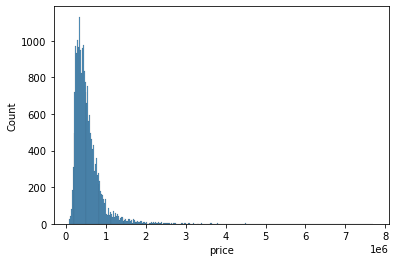

In [81]:
sns.histplot(data = house_data, x = 'price')   

Afin d'améliorer la précision de cette visualisation, nous pouvons passer la feature 'price' en logarithme : 

In [82]:
# Transformation des prix en log
house_data['price_log'] = np.log(house_data['price'])

<AxesSubplot:xlabel='price_log', ylabel='Count'>

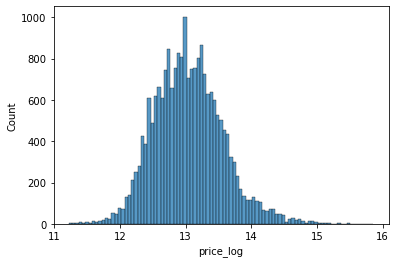

In [83]:
sns.histplot(data=house_data, x = 'price_log')

Ensuite on va venir modéaliser notre autres features : 

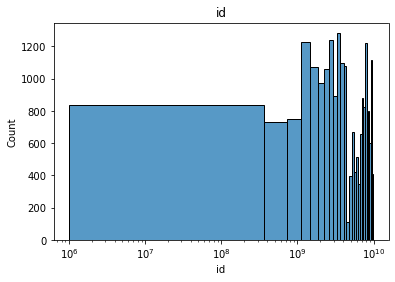

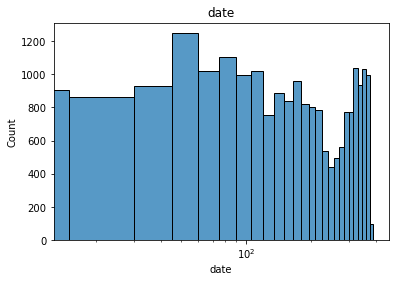

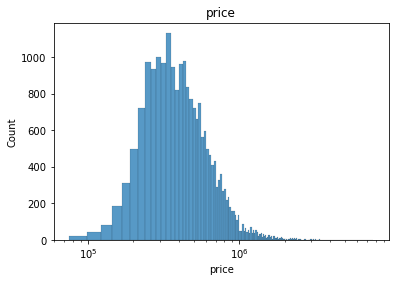

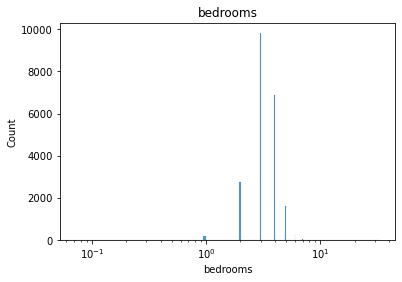

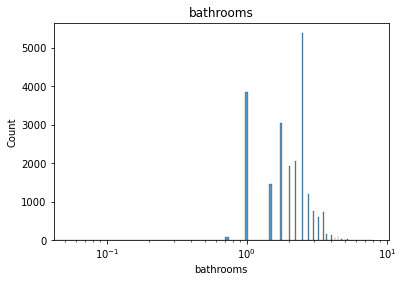

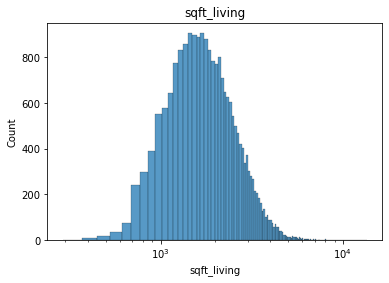

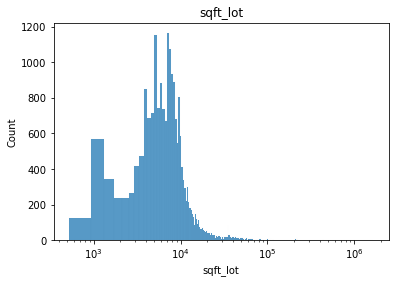

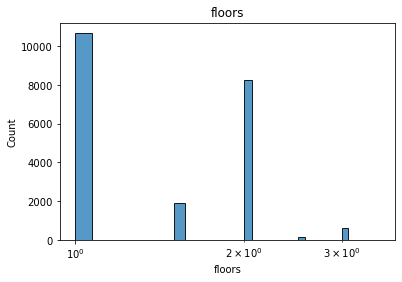

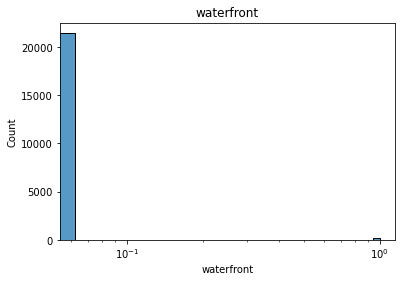

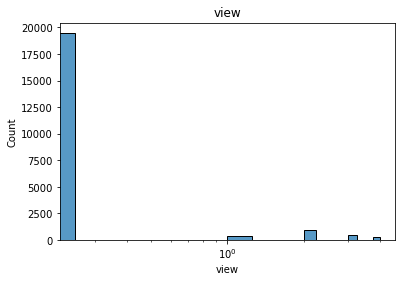

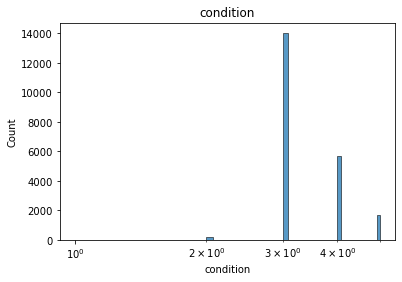

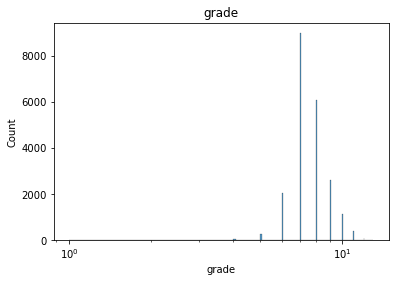

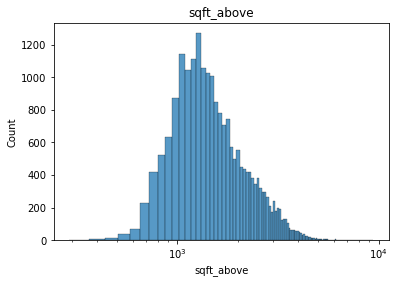

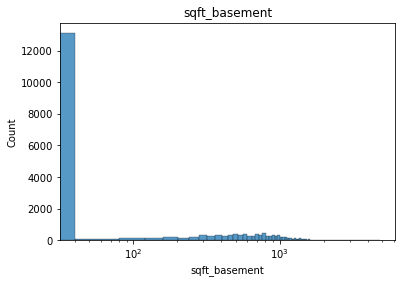

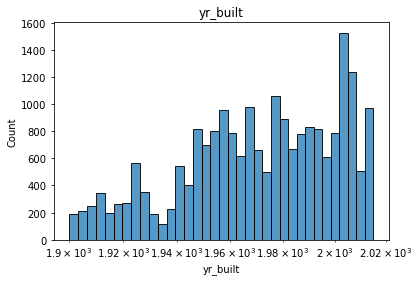

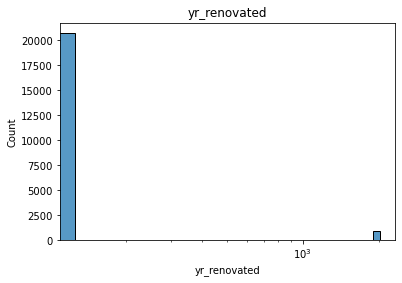

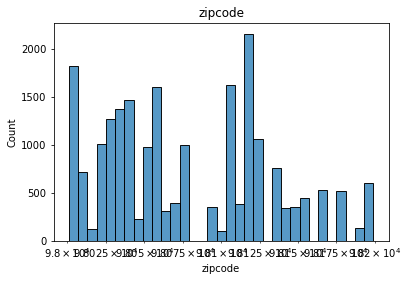

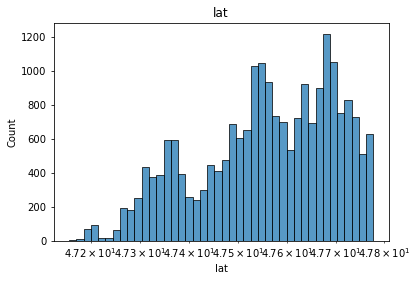

/tmp/ipykernel_17075/2329081353.py:4: UserWarning:

Data has no positive values, and therefore cannot be log-scaled.



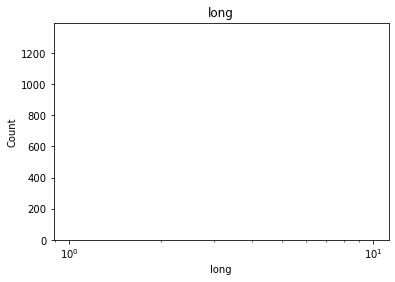

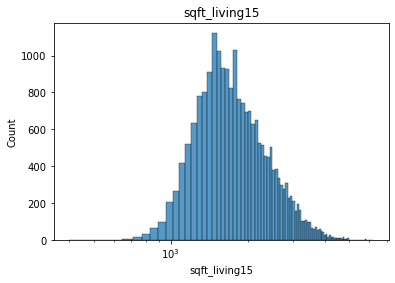

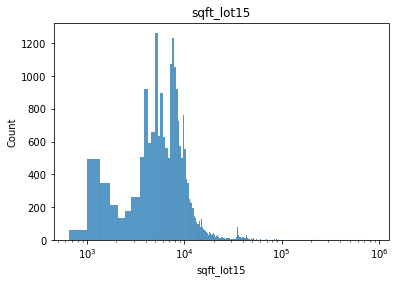

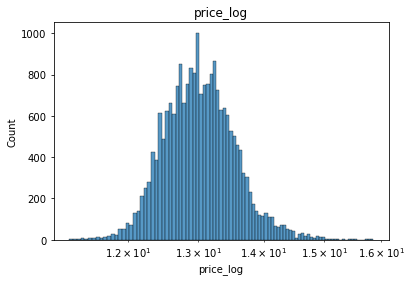

In [84]:
for col in house_data.columns:                                                                                  #Boucle : pour chaque colonne du dataset 
    sns.histplot(data = house_data, x = col)                                                                    #Faire un histogramme de la colonne visée  
    plt.title(col)                                                                                              #En titre, mettre le nom de cette colonne 
    plt.xscale('log')                                                                                           #Mise en logarithme pour une visibilité facilité 
    plt.show()                                                                                                  #Montrer le shémas 

* Pour optimiser cette visualisation, on va utiliser la fonction Scatter (nuage de point) :

In [85]:
import matplotlib.pyplot as plt 

#prplot seabron + heatmap de la correlation 
scattermapbox plotly express utiliser lat + long en fct du prix avec 3eme dim avec prix log 

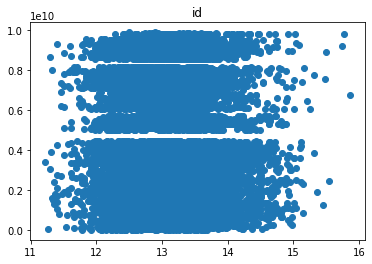

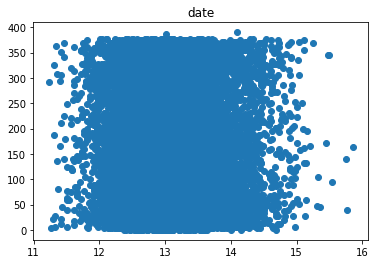

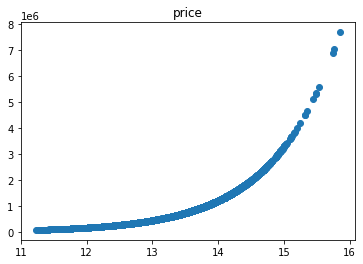

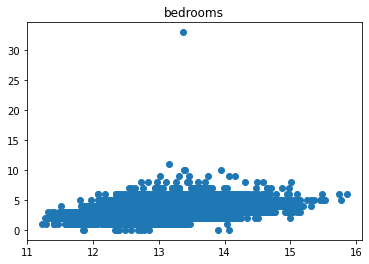

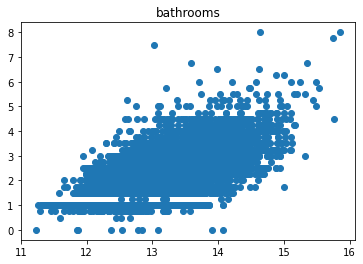

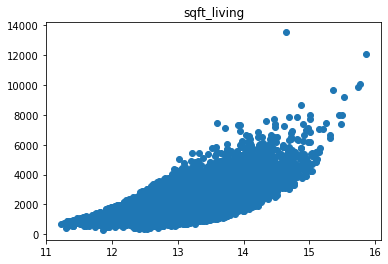

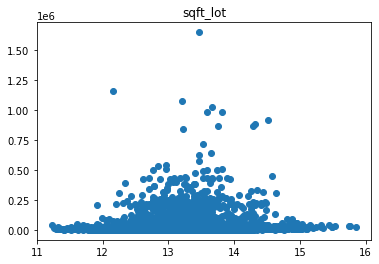

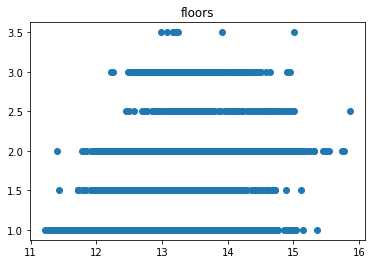

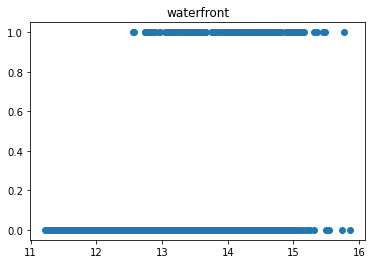

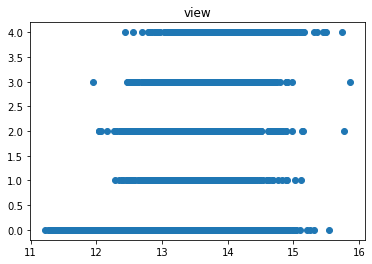

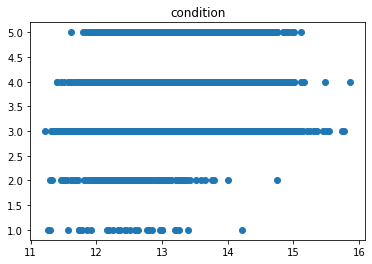

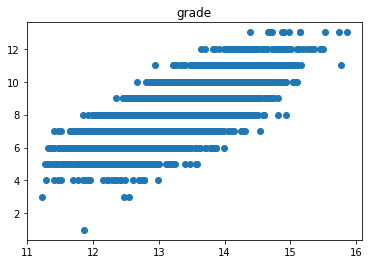

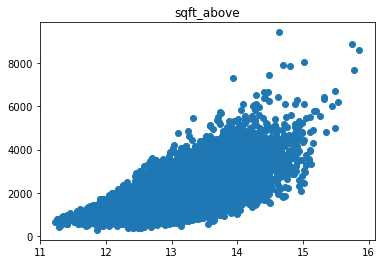

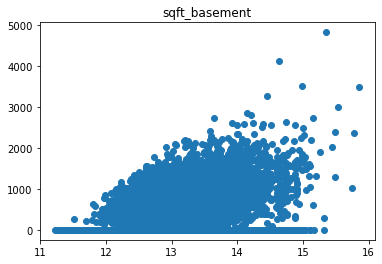

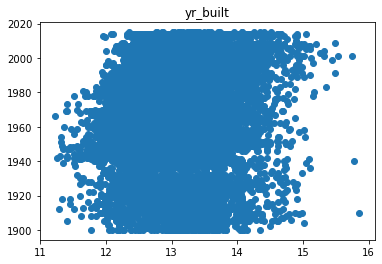

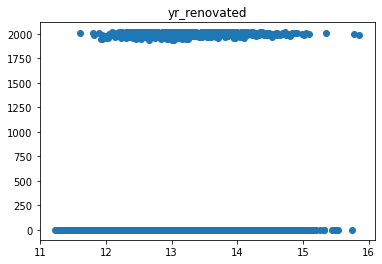

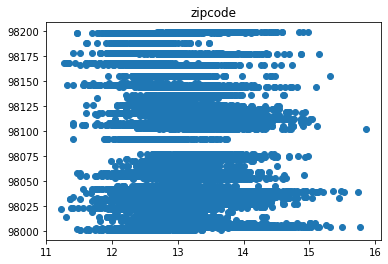

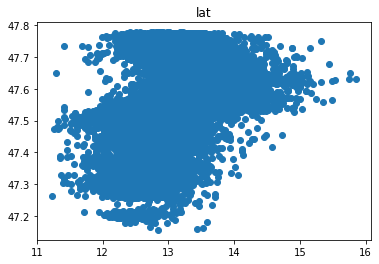

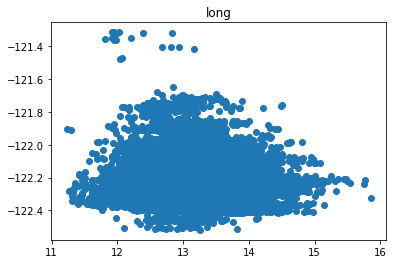

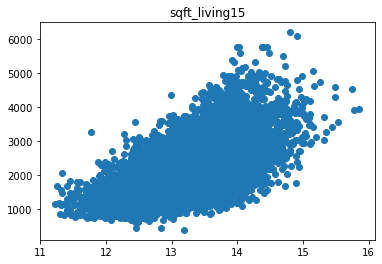

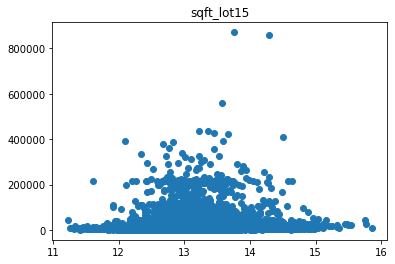

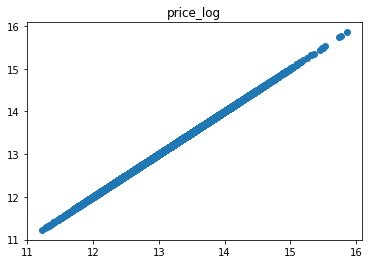

In [86]:
for col in house_data.columns:
    plt.scatter(x = house_data['price_log'], y =house_data[col])
    plt.title(col)  
    plt.show()

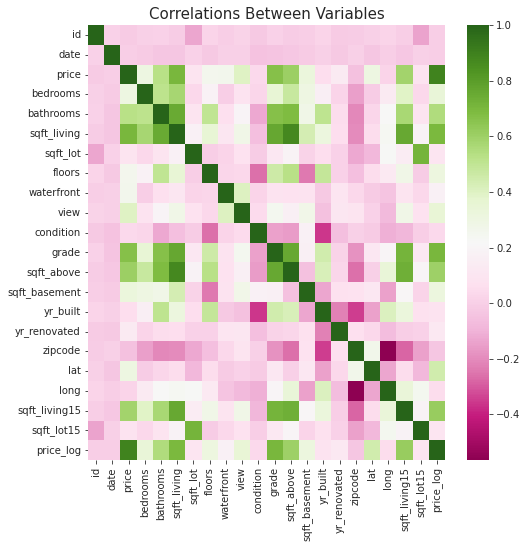

In [87]:
with sns.axes_style('ticks', {'figure.facecolor': 'white'}):
    plt.figure(figsize=(8,8))
    sns.heatmap(house_data.corr(),cmap="PiYG")
    plt.title("Correlations Between Variables", size=15)
    plt.show()

In [88]:
pd.set_option('display.max_columns',None)
corrmat = house_data.corr()
sorted_corrs = corrmat['price'].abs().sort_values()
print(sorted_corrs)

date             0.004357
id               0.016762
long             0.021626
condition        0.036362
zipcode          0.053203
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308350
sqft_basement    0.323816
view             0.397293
bathrooms        0.525138
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price_log        0.891654
price            1.000000
Name: price, dtype: float64


In [89]:
import plotly.express as px 
import plotly.io as pio
pio.renderers.default = "notebook_connected"                                       
fig = px.scatter_mapbox(house_data, lat='lat', lon='long',color='price_log')
fig.update_layout(
    mapbox = {
        'style': "stamen-terrain",
        'center': {'lon': -122, 'lat': 47 },
        'zoom': 5},
    showlegend = False,
    height=800)
fig.show()

## Partie II. Modèle 

Dans le cadre d'une regression linéaire, le modèle developpé est un modèle linéaire de type f(x) = ax + b. On ne connait pas les paramètres en revanches on peut imposer à la machine un modèle. Aussi on va développer un modèle de type f(x) = ax + b car le modèle linéaire est une droite. Cependant dans cette fonction f(x) = ax + b, les paramètres a(pente) et b (ordonnée à l'origine) ne sont pas connues, ça sera à la machine de les trouver. 

Cette partie se composera en 2 étapes : la première consiste à préparer et nettoyer notre base de donnée et la seconde à déclarer notre modèle. 

* Préparation des données 

Pour rappel, dans notre algorithme nous cherchons à prédire le prix d'une maison en fonction de ces caractèristiques. Aussi le prix de la maison, la feature 'price' sera la target 'y'. Les autres caractèristiques, les features seront nommés 'X'.

In [90]:
pd.set_option('display.max_columns', None)
house_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_log
0,7129300520,164,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,12.309982
1,6414100192,221,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,13.195614
2,5631500400,299,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,12.100712
3,2487200875,221,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,13.311329
4,1954400510,292,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,13.142166


In [91]:
house_data_y = house_data['price']                     # Séparation des features et des targets, ici on détermine notre variable cible 
house_data_x = house_data[['bathrooms','zipcode', 'sqft_living','sqft_lot','floors','waterfront','view','condition','sqft_above','grade','sqft_basement','yr_built','yr_renovated','lat','long']]     # Déterminations des variables x : variables connues qui permettent de déterminer y
#drop

* Creation du modèle

Ensuite on créé le modèle que l'on souhaite utiliser, ici le modèle de régression linéaire. Pour cela on importe auparavant les bibliotèques nécessaires :

*création pipeline

In [92]:
from sklearn.linear_model import LinearRegression   #importation du modèle linéaire 
lr = LinearRegression()                             #Définition du modèle de régression liénaire

## Partie III. Fonctions coût 

Cette fonction va mesurer les erreurs entre le modèle et nos exemples. Ici par exemple, elle va mesurer les erreurs de prix en fonctions des caractèristiques des maisons. Pour mesurer nos erreurs il y a une formule qui s'appelle  la formule cout. La formule cout, c'est l'ensemble de nos erreurs mis au carré. La formule mathématiques donne au finale : 



## Partie IV. Algorithme de minimisation

* Création d'une base de donnée d'entrainement pour l'algorithme :

In [93]:
from sklearn.model_selection import train_test_split        #Importation de la bibliotèque pour la séparatio ndes données d'entraienemnt et des données de tests 
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [94]:
x_train,x_test, y_train,y_test=train_test_split(house_data_x,house_data_y,test_size=0.2,random_state=42)  # entraienemnt sur 80% de la base de donnée) 


In [95]:
x_train.shape   #Affichage de la taille des données d'entrainement

(17290, 15)

In [96]:
x_test.shape    # Affichage de la taille des données de test 

(4323, 15)

* Creation d'une pipeline : 

In [97]:
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

numerical_features = ['sqft_living','sqft_lot','sqft_above','sqft_basement']
categorical_features = ['yr_built','yr_renovated','zipcode']

numerical_pipeline = make_pipeline(SimpleImputer(),StandardScaler())
categorical_pipeline = make_pipeline(SimpleImputer(strategy = 'most_frequent'), OneHotEncoder())

preprocessor = make_column_transformer((numerical_pipeline, numerical_features),(categorical_pipeline,categorical_features))

In [98]:
model = make_pipeline((preprocessor),LinearRegression())

model.fit(x_train, y_train)
model.predict(x_test)

array([ 365080.44022201,  822521.46568453, 1134245.49451953, ...,
        422854.21983519,  704323.7311521 ,  464275.0734156 ])

* Entrainement du modèle :

In [99]:
#lr.fit(x_train,y_train)                 # On entraine l'algo pour comprendre le prix des maisons (x) en fonction des charactèristiques des maisons (y)
#lr.score(x_test,y_test)

* Réalisation des prévisions avec le modèle: 

In [100]:
y_pred = model.predict(x_test)         # Prédiction des x en fonction des y que l'on fournit à l'algorithme 
#y_pred

* Comparaison entre y_pred (prédiction de l'algorithme) et y_test (valeur initiale du dataframe) : 

In [101]:
y_pred          #Affichage des prédictions 

array([ 365080.44022201,  822521.46568453, 1134245.49451953, ...,
        422854.21983519,  704323.7311521 ,  464275.0734156 ])

In [102]:
y_test          #Affichage des résultats originaux 

735       365000.0
2830      865000.0
4106     1038000.0
16218    1490000.0
19964     711000.0
           ...    
13674     338000.0
20377     673000.0
8805      285000.0
10168     605000.0
2522      356500.0
Name: price, Length: 4323, dtype: float64

* Calcul des performance de l'algorithme avec le modèle du MSE :

In [103]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)
# np.mean((y_test - y_pred))**2)) equivalent en écriture mathématiques 

42555720207.21527

* Calcul des performances de l'algorithme avec le r² :

In [104]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7185034680810425